## LOB Cuskit Launch impacted by Covid-19 Cases
New cases, deaths and etc

## DATA SOURCE
https://ourworldindata.org/covid-cases

In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

df = pd.read_csv('data/owid-covid-data.csv')

In [2]:
#Removing unnecessary columns 
df.drop(['total_cases','new_cases_smoothed','total_deaths','new_deaths_smoothed','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','icu_patients_per_million','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests','new_tests','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','tests_per_case','tests_units','total_vaccinations','new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred','new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred','stringency_index','median_age','aged_65_older','aged_70_older','gdp_per_capita','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','excess_mortality_cumulative_absolute','excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million','iso_code','continent'], axis = 1, inplace = True)

#Defining unnecessary rows
removedRows = ["Africa","Albania","Algeria","Andorra","Angola","Anguilla","Antigua and Barbuda","Aruba","Asia","Azerbaijan","Bahamas","Bahrain","Barbados","Belize","Benin","Bermuda","Bolivia","Bonaire Sint Eustatius and Saba","Bosnia and Herzegovina","Botswana","British Virgin Islands","Bulgaria","Burkina Faso","Burundi","Cameroon","Cape Verde","Cayman Islands","Central African Republic","Chad","Comoros","Congo","Costa Rica","Cote d'Ivoire","Croatia","Cuba","Curacao","Cyprus","Democratic Republic of Congo","Djibouti","Dominica","Dominican Republic","Ecuador","Egypt","El Salvador","Equatorial Guinea","Eritrea","Estonia","Eswatini","Ethiopia","Europe","European Union","Faeroe Islands","Falkland Islands","French Polynesia","Gabon","Gambia","Georgia","Ghana","Gibraltar","Greenland","Grenada","Guatemala","Guernsey","Guinea","Guinea-Bissau","Guyana","Haiti","High income","Honduras","Iceland","International","Iran","Iraq","Isle of Man","Israel","Jamaica","Jersey","Jordan","Kenya","Kosovo","Kuwait","Latvia","Lebanon","Lesotho","Liberia","Libya","Liechtenstein","Lithuania","Low income","Lower middle income","Macao","Madagascar","Malawi","Mali","Malta","Marshall Islands","Mauritania","Mauritius","Micronesia (country)","Monaco","Montenegro","Montserrat","Morocco","Mozambique","Namibia","New Caledonia","Nicaragua","Niger","Nigeria","Niue","North America","North Macedonia","Northern Cyprus","Oceania","Oman","Palestine","Panama","Paraguay","Pitcairn","Qatar","Romania","Rwanda","Saint Helena","Saint Kitts and Nevis","Saint Lucia","Saint Pierre and Miquelon","Saint Vincent and the Grenadines","San Marino","Sao Tome and Principe","Saudi Arabia","Senegal","Serbia","Seychelles","Sierra Leone","Sint Maarten (Dutch part)","Slovenia","Somalia","South America","South Sudan","Sudan","Suriname","Syria","Tanzania","Togo","Tokelau","Trinidad and Tobago","Tunisia","Turkmenistan","Turks and Caicos Islands","Uganda","Ukraine","United Arab Emirates","Upper middle income","Uruguay","Uzbekistan","Vatican","Wallis and Futuna","World","Yemen","Zambia","Zimbabwe"]

In [3]:
df

,location,date,new_cases,new_deaths,reproduction_rate,icu_patients,hosp_patients,positive_rate,people_vaccinated,people_fully_vaccinated,total_boosters,population,population_density,extreme_poverty
0,Afghanistan,2020-02-24,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,NaN
1,Afghanistan,2020-02-25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,NaN
2,Afghanistan,2020-02-26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,NaN
3,Afghanistan,2020-02-27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,NaN
4,Afghanistan,2020-02-28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176216,Zimbabwe,2022-03-30,140.0,1.0,0.65,NaN,NaN,0.0642,5175175.0,3522062.0,505132.0,15092171.0,42.729,21.4
176217,Zimbabwe,2022-03-31,104.0,4.0,NaN,NaN,NaN,0.0575,5297081.0,3532708.0,539033.0,15092171.0,42.729,21.4
176218,Zimbabwe,2022-04-01,128.0,0.0,NaN,NaN,NaN,0.0423,5372837.0,3543725.0,564632.0,15092171.0,42.729,21.4
176219,Zimbabwe,2022-04-02,67.0,2.0,NaN,NaN,NaN,NaN,5455680.0,3553083.0,591761.0,15092171.0,42.729,21.4


In [4]:
# #Grouping BU into Region
# # APJ = ["Afghanistan","Australia","Bangladesh","Bhutan","Brunei","Cambodia","China","Cook Islands","Fiji","Hong Kong","India","Indonesia","Japan","Kiribati","Laos","Malaysia","Maldives","Mongolia","Myanmar","Nauru","Nepal","New Zealand","Pakistan","Palau","Papua New Guinea","Philippines","Samoa","Singapore","Solomon Islands","South Korea","Sri Lanka","Taiwan","Thailand","Timor","Tonga","Tuvalu","Vanuatu","Vietnam"]
# # AMER = ["Argentina","Brazil","Canada","Chile","Colombia","Mexico","Peru","United States","Venezuela"]
# # EMEA = ["Armenia","Austria","Belarus","Belgium","Czechia","Denmark","Finland","France","Germany","Greece","Hungary","Ireland","Italy","Kazakhstan","Kyrgyzstan","Luxembourg","Moldova","Netherlands","Norway","Poland","Portugal","Russia","Slovakia","South Africa","Spain","Sweden","Switzerland","Tajikistan","Turkey","United Kingdom"]

# # Add new column with an existing column and their respective value pairs.
# region = {"APJ":"Afghanistan","APJ":"Australia","APJ":"Bangladesh","APJ":"Bhutan","APJ":"Brunei","APJ":"Cambodia","APJ":"China",
#          "APJ":"Cook Islands","APJ":"Fiji","APJ":"Hong Kong","APJ":"India","APJ":"Indonesia",
#          "APJ":"Japan","APJ":"Kiribati","APJ":"Laos","APJ":"Malaysia","APJ":"Maldives","APJ":"Mongolia",
#          "APJ":"Myanmar","APJ":"Nauru","APJ":"Nepal","APJ":"New Zealand","APJ":"Pakistan","APJ":"Palau",
#          "APJ":"Papua New Guinea","APJ":"Philippines","APJ":"Samoa","APJ":"Singapore","APJ":"Solomon Islands",
#          "APJ":"South Korea","APJ":"Sri Lanka","APJ":"Taiwan","APJ":"Thailand","APJ":"Timor","APJ":"Tonga",
#          "APJ":"Tuvalu","APJ":"Vanuatu","APJ":"Vietnam",
#          "AMER":"Argentina","AMER":"Brazil","AMER":"Canada","AMER":"Chile","AMER":"Colombia","AMER":"Mexico",
#          "AMER":"Peru","AMER":"United States","AMER":"Venezuela",
#          "EMEA":"Armenia","EMEA":"Austria","EMEA":"Belarus","EMEA":"Belgium","EMEA":"Czechia","EMEA":"Denmark",
#          "EMEA":"Finland","EMEA":"France","EMEA":"Germany","EMEA":"Greece","EMEA":"Hungary","EMEA":"Ireland",
#          "EMEA":"Italy","EMEA":"Kazakhstan","EMEA":"Kyrgyzstan","EMEA":"Luxembourg","EMEA":"Moldova","EMEA":"Netherlands",
#          "EMEA":"Norway","EMEA":"Poland","EMEA":"Portugal","EMEA":"Russia","EMEA":"Slovakia","EMEA":"South Africa",
#          "EMEA":"Spain","EMEA":"Sweden","EMEA":"Switzerland","EMEA":"Tajikistan","EMEA":"Turkey","EMEA":"United Kingdom"}

# # Provide 'Region' as the column name
# df['Region'] = region 

In [5]:
# Removing unnecessary rows
df = df[df.location.isin(removedRows) == False]

# Replacing null value to zero
df = df.replace(np.nan, 0)

#Removing 0 value rows
df = df.loc[(df == 0).any(axis=1)]

In [6]:
# Converting Date column into Datetime format
from datetime import datetime
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.head(5)

,location,date,new_cases,new_deaths,reproduction_rate,icu_patients,hosp_patients,positive_rate,people_vaccinated,people_fully_vaccinated,total_boosters,population,population_density,extreme_poverty
0,Afghanistan,2020-02-24,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0
1,Afghanistan,2020-02-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0
2,Afghanistan,2020-02-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0
3,Afghanistan,2020-02-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0
4,Afghanistan,2020-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0


In [8]:
# Grouping columns by Location & Year
#groupDeath = df.groupby([(df.location),(df.date.dt.year)])["new_cases"].sum()
groupCase = df.groupby([(df.location),(df.date.dt.year)]).agg(
    {'new_cases':['sum'],
    'new_deaths':['sum'],
    'reproduction_rate':['sum'],
    'icu_patients':['sum'],
    'hosp_patients':['sum'],
    'positive_rate':['sum'],
    'people_vaccinated':['sum'],
    'people_fully_vaccinated':['sum'],
    'total_boosters':['sum'],
    'population':['sum'],
    'population_density':['sum'],
    'extreme_poverty':['sum']})
groupCase.info()



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 235 entries, ('Afghanistan', 2020) to ('Vietnam', 2022)
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   (new_cases, sum)                235 non-null    float64
 1   (new_deaths, sum)               235 non-null    float64
 2   (reproduction_rate, sum)        235 non-null    float64
 3   (icu_patients, sum)             235 non-null    float64
 4   (hosp_patients, sum)            235 non-null    float64
 5   (positive_rate, sum)            235 non-null    float64
 6   (people_vaccinated, sum)        235 non-null    float64
 7   (people_fully_vaccinated, sum)  235 non-null    float64
 8   (total_boosters, sum)           235 non-null    float64
 9   (population, sum)               235 non-null    float64
 10  (population_density, sum)       235 non-null    float64
 11  (extreme_poverty, sum)          235 non-null    float64
dtypes:

In [9]:
# Grouping columns by Location & Year
#groupDeath = df.groupby([(df.location),(df.date.dt.year)])["new_cases"].sum()
groupCase = df.groupby([(df.location),(df.date.dt.year)]).agg(
    New_Cases = ('new_cases','sum'),
    New_Deaths = ('new_deaths','sum'),
    Reproduction_Rate = ('reproduction_rate','sum'),
    ICU_Patients = ('icu_patients','sum'),
    Hosp_Patients = ('hosp_patients','sum'),
    Positive_Rate = ('positive_rate','sum'),
    People_Vaccinated = ('people_vaccinated','sum'),
    People_Fully_Vaccinated = ('people_fully_vaccinated','sum'),
    Total_Boosters = ('total_boosters','sum'),
    Population = ('population','sum'),
    Population_Density = ('population_density','sum'),
    Extreme_Poverty = ('extreme_poverty','sum'),).reset_index()

groupCase


,location,date,New_Cases,New_Deaths,Reproduction_Rate,ICU_Patients,Hosp_Patients,Positive_Rate,People_Vaccinated,People_Fully_Vaccinated,Total_Boosters,Population,Population_Density,Extreme_Poverty
0,Afghanistan,2020,52332.0,2189.0,307.68,0.0,0.0,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,1.242865e+10,16979.664,0.0
1,Afghanistan,2021,105754.0,5167.0,365.51,0.0,0.0,0.0000,1.936857e+07,9.741539e+06,0.000000e+00,1.453993e+10,19864.030,0.0
2,Afghanistan,2022,19749.0,315.0,100.56,0.0,0.0,9.6498,7.884248e+07,6.797521e+07,0.000000e+00,3.704695e+09,5061.246,0.0
3,Argentina,2020,1625514.0,43245.0,332.87,538765.0,0.0,82.7040,1.044510e+05,2.500000e+01,0.000000e+00,1.669173e+10,5920.782,219.6
4,Argentina,2021,4028894.0,73924.0,376.57,1205691.0,0.0,51.3790,6.627305e+09,3.967056e+09,1.589080e+08,1.664613e+10,5904.605,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Venezuela,2021,331077.0,4300.0,374.27,0.0,0.0,0.0000,9.872001e+07,5.769384e+07,0.000000e+00,1.047731e+10,13232.345,0.0
231,Venezuela,2022,76208.0,358.0,85.88,0.0,0.0,0.0000,1.533605e+08,9.924466e+07,1.264466e+06,2.669560e+09,3371.529,0.0
232,Vietnam,2020,1465.0,36.0,220.20,0.0,0.0,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.377008e+10,105995.688,688.0
233,Vietnam,2021,1729792.0,32359.0,422.57,0.0,0.0,4.2461,5.730473e+09,7.157968e+08,0.000000e+00,3.583162e+10,112466.355,730.0


In [10]:
# CSV file
groupCase = pd.DataFrame(groupCase)
groupCase.to_csv('data/groupbyCases.csv',index=False)

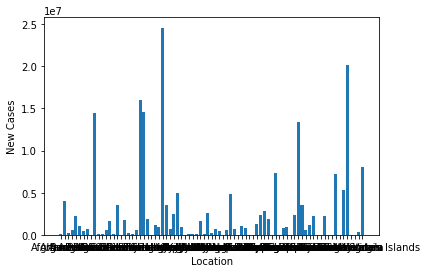

In [11]:
x = groupCase['location']
y = groupCase['New_Cases']

plt.xlabel('Location')
plt.ylabel('New Cases')
plt.bar(x,y)
plt.show()